# SmartInternz Externship Program - Applied Data Science - Final Project

### Project Title: Movie Box Office Gross Prediction<br>Team Number: 358<br>Team Members: Sanskriti Sanjay Kumar Singh, Chaitra S J, Deepika Nuthi, Seelam Venkata Sai Reddy

## Data Preprocessing

In [1]:
# Importing the necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Loading the datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

### Exploratory Data Analysis

In [3]:
# Displaying the first 5 records of the movies dataset
movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [4]:
# Displaying the shape of the movies dataset i.e. (no. of records, no. of attributes)
movies.shape

(4803, 20)

In [5]:
# Displaying the first 5 records of the credits dataset
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [6]:
# Displaying the shape of the credits dataset i.e. (no. of records, no. of attributes)
credits.shape

(4803, 4)

<b>From the above four outputs, we can observe that both movies and credits dataset have id & movie_id and original_title & title in common and both consist of the same amount of records too. So we can  proceed by merging the two based on the common key element (i.e. the element which is unique for each record).</b>

In [7]:
credits.rename(columns = {'movie_id':'id'}, inplace = True)

In [8]:
# Checking whether the above process has been done successfully
credits.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [9]:
# Merging the two datasets based on the key element 'id'
df = movies.merge(credits, on = 'id')

In [10]:
# Displaying the first 5 records of the newly merged dataset
df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                    title_x vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne /

In [11]:
# Displaying the shape of the dataset i.e. (no. of records, no. of attributes)
df.shape

(4803, 23)

In [12]:
# Displaying information about the dataset attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

<b>Now, with the help of the info() function, we see that the data type of release_date is of the type 'object' when instead it should be 'datetime'.</b>

In [13]:
# Changing the data type of the attribute 'release_date'
df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())

### Types of Data
<br>
<b>Qualitative Data</b> 
<br>
Nominal: genres, homepage, id, keywords, original_language, original_title, overview, production_companies, production_countries, spoken_languages, status, tagline, title_x, title_y, cast, crew
<br>
Ordinal: release_date
<br><br>
<b>Quantitative Data</b>
<br>
Discrete: vote_count
<br>
Continuous: budget, popularity, revenue, runtime, vote_average

In [14]:
# Displaying summary statistics for the numerical attributes
df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

<b>Also, we can see that seven of the attributes consist of json objects which first needs to parsed into dictionaries.</b>

In [15]:
# Parsing json objects into dictionaries
json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']
for column in json_columns:
    df[column] = df[column].apply(json.loads)

### Data Visualization

#### Univariate Analysis

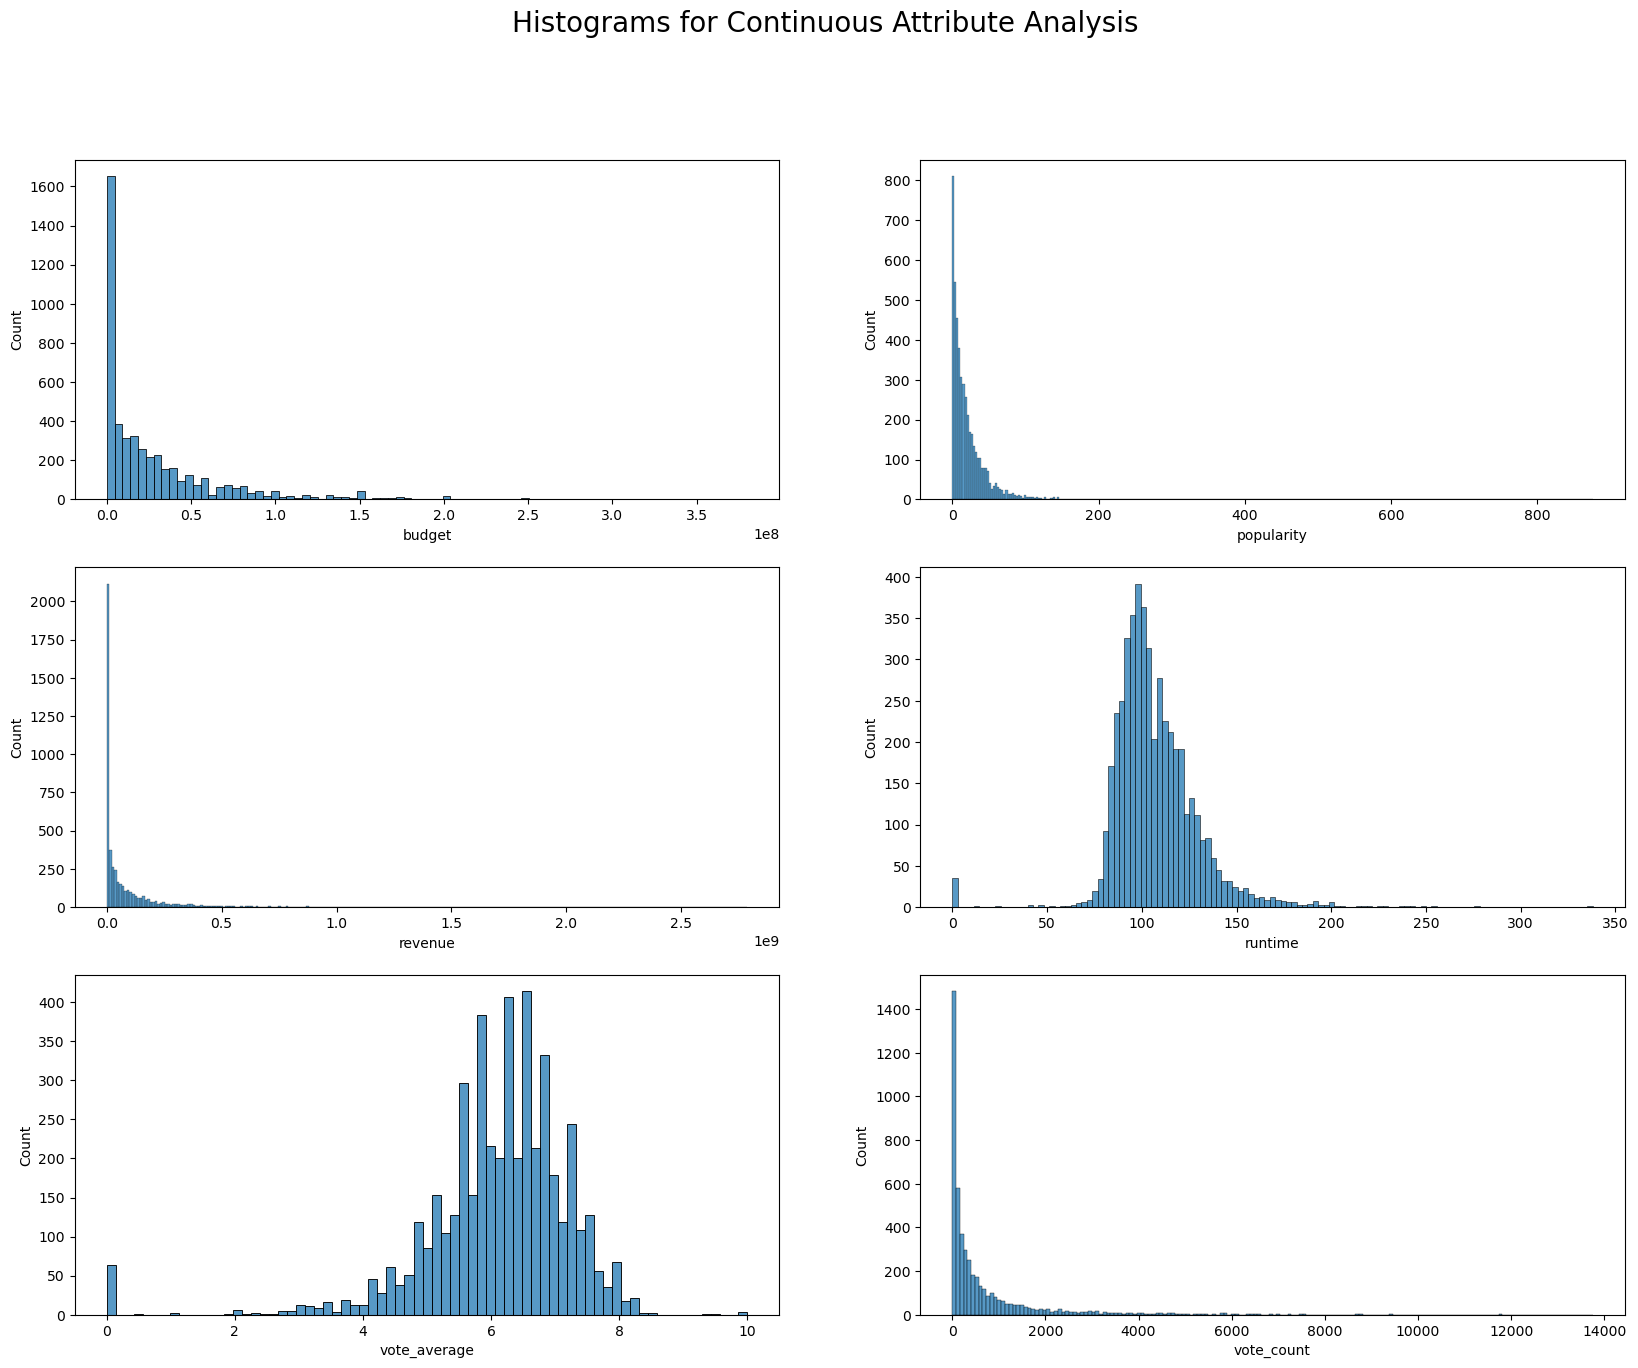

In [16]:
# Visualizing the distribution of quantitative attributes using histograms
fig,ax = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('Histograms for Continuous Attribute Analysis', fontsize = 20)

sns.histplot(ax = ax[0,0], x = 'budget', data = df)
sns.histplot(ax = ax[0,1], x = 'popularity', data = df)
sns.histplot(ax = ax[1,0], x = 'revenue', data = df)
sns.histplot(ax = ax[1,1], x = 'runtime', data = df)
sns.histplot(ax = ax[2,0], x = 'vote_average', data = df)
sns.histplot(ax = ax[2,1], x = 'vote_count', data = df); # semicolon added to remove unecessary output text

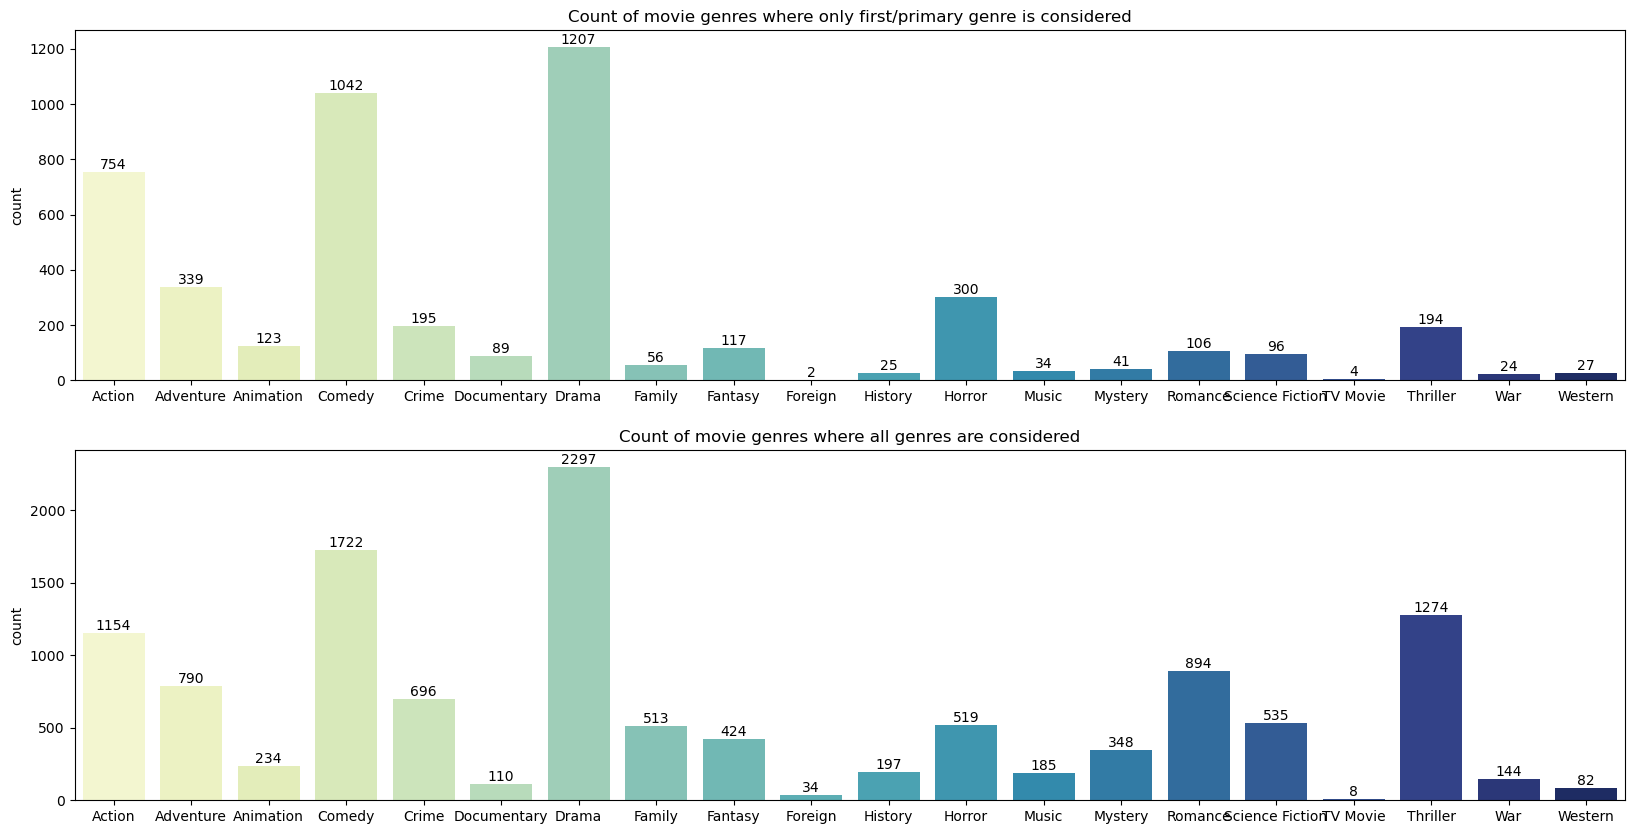

In [17]:
# Visualizing the counts of the genres of the movies
primary_genres = df['genres'].apply(lambda x: x[0]['name'] if len(x)!=0 else pd.NA)
primary_genres = primary_genres.dropna()
primary_genres = primary_genres.tolist()
primary_genres.sort()

all_genres = []
glst = df['genres'].apply(lambda x: [i['name'] for i in x])
for genre in glst:
    all_genres.extend(genre)
all_genres.sort()
    
fig,ax = plt.subplots(2,1,figsize=(20,10))
sns.countplot(ax = ax[0], x = primary_genres, palette = 'YlGnBu')
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Count of movie genres where only first/primary genre is considered')
sns.countplot(ax = ax[1], x = all_genres, palette = 'YlGnBu')
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Count of movie genres where all genres are considered');

In [18]:
# Since there's not much difference, let us just consider the first genre for each movie
df['genres'] = df['genres'].apply(lambda x: x[0]['name'] if len(x)!=0 else pd.NA)

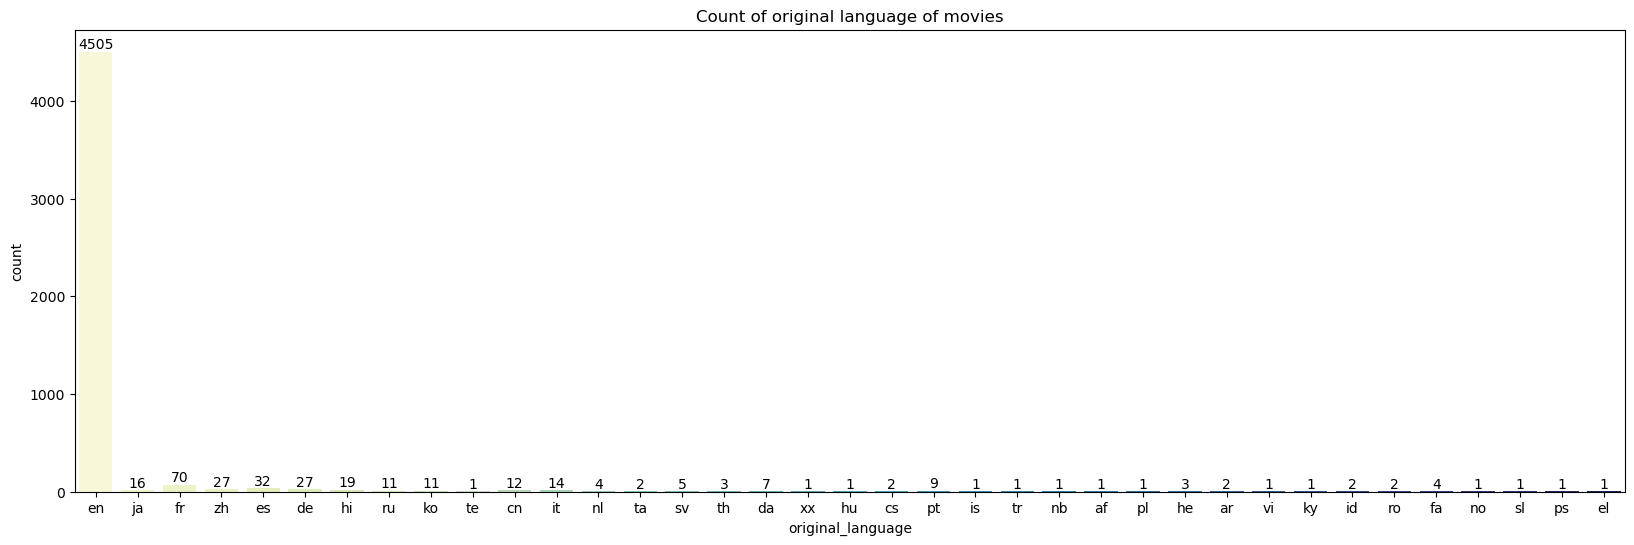

In [19]:
# Getting the counts of the original language of movies
plt.figure(figsize = (20, 6))
ax = sns.countplot(x = df['original_language'], palette = 'YlGnBu')
ax.bar_label(ax.containers[0])
ax.set_title('Count of original language of movies');

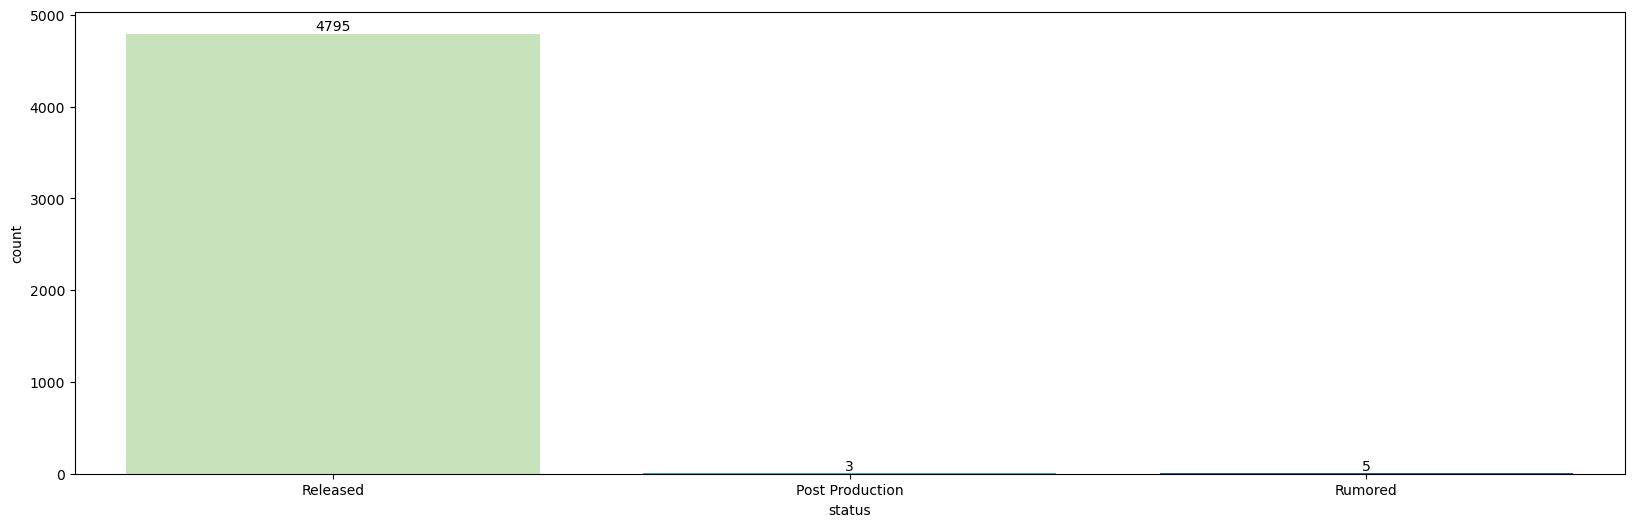

In [20]:
# Getting the count of movies having different statuses
plt.figure(figsize = (20, 6))
ax = sns.countplot(x = df['status'], palette = 'YlGnBu')
ax.bar_label(ax.containers[0]);

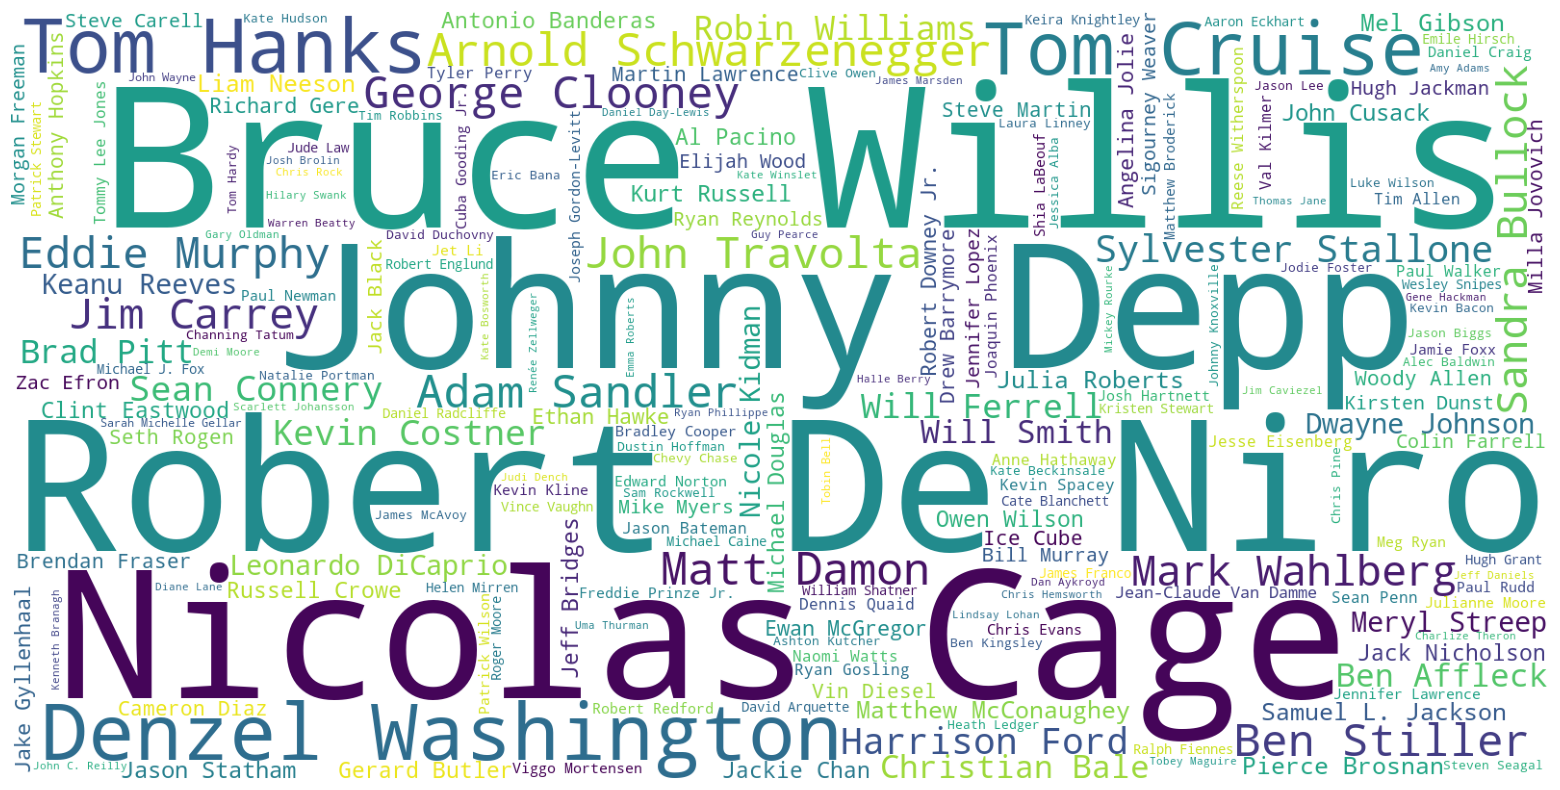

In [21]:
# Getting insight on which actors played the role of main characters the most in movies
cast = df['cast'].apply(lambda x: x[0]['name'] if len(x)!=0 else pd.NA)
cast = cast.dropna()

d = Counter(cast)
wordcloud = WordCloud(width=1600, height=800, background_color ='white', collocations=False).generate_from_frequencies(d)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

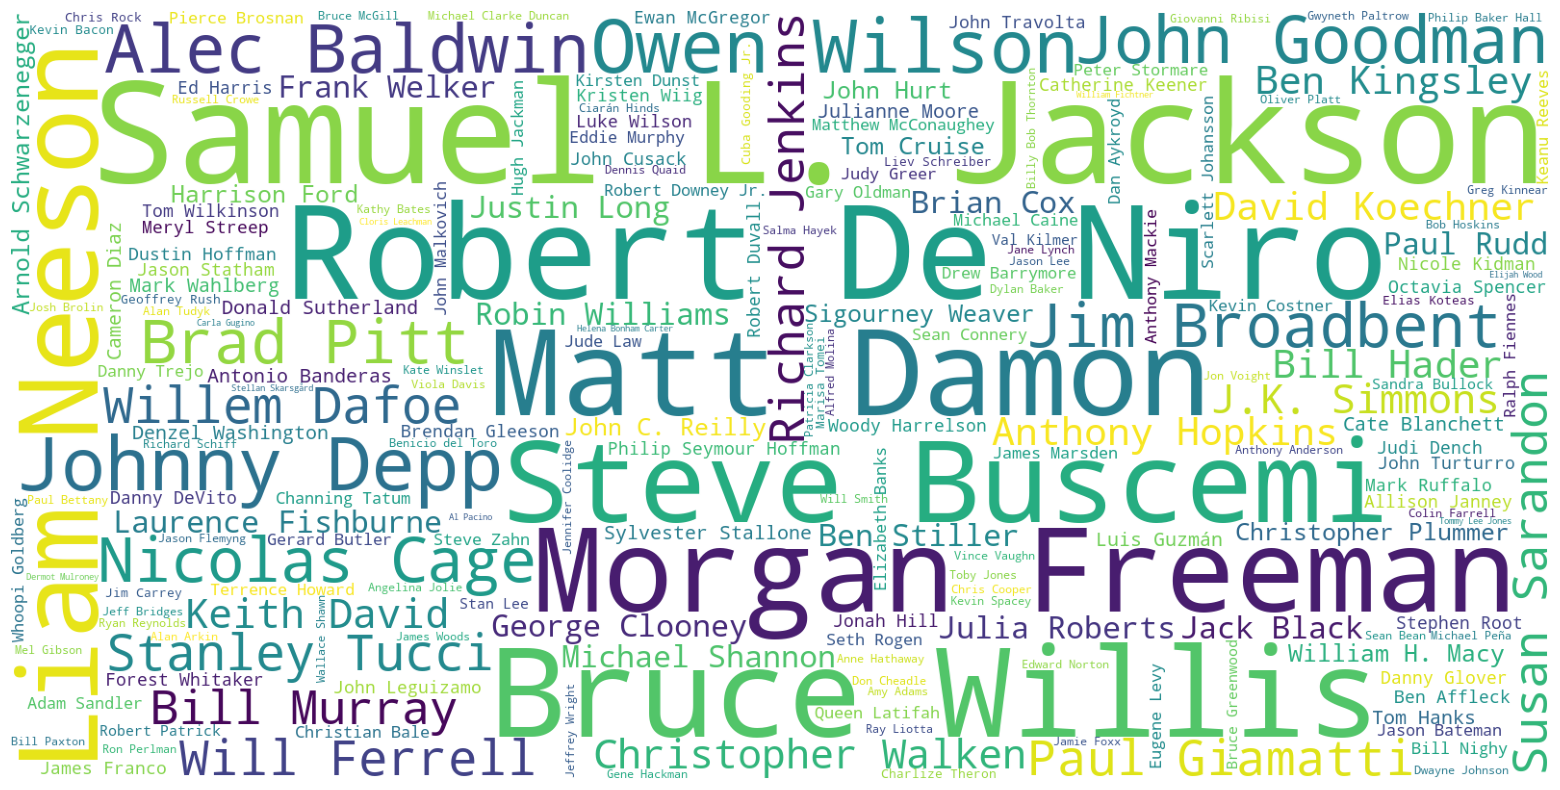

In [22]:
# Getting insight on actors who have appeared the most in movies
all_cast = []
clst = df['cast'].apply(lambda x: [i['name'] for i in x])
for genre in clst:
    all_cast.extend(genre)
all_cast.sort()

d = Counter(all_cast)
wordcloud = WordCloud(width=1600, height=800, background_color ='white', collocations=False).generate_from_frequencies(d)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

In [23]:
def find_director(c):
    for m in c:
        if m['job'] == 'Director':
            return m['name']

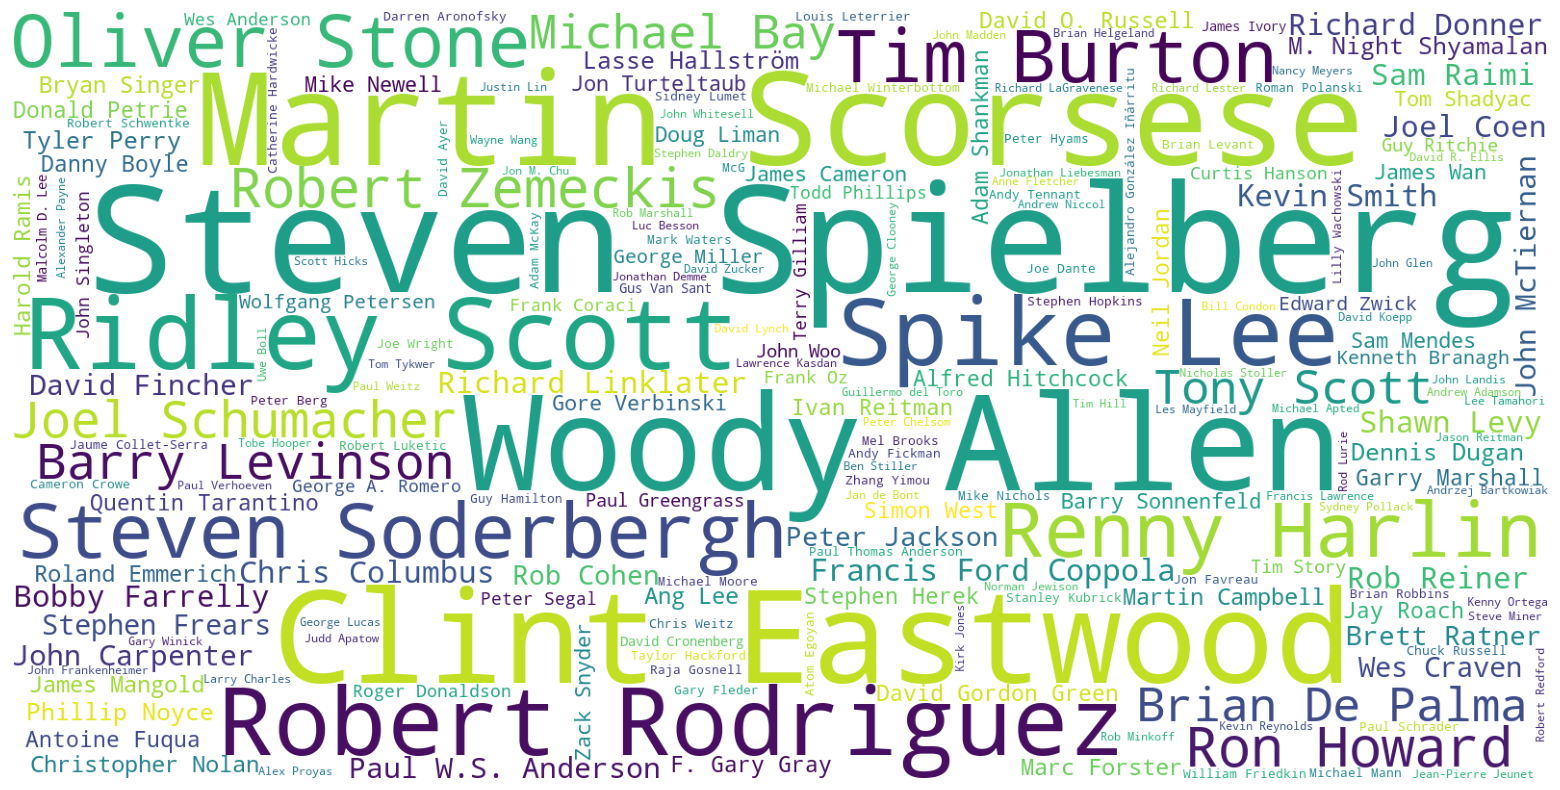

In [24]:
# Getting insight on the directors who directed the most amount of movies
directors = df['crew'].apply(lambda x: find_director(x))
directors = directors.dropna()

d = Counter(directors)
wordcloud = WordCloud(width=1600, height=800, background_color ='white', collocations=False).generate_from_frequencies(d)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

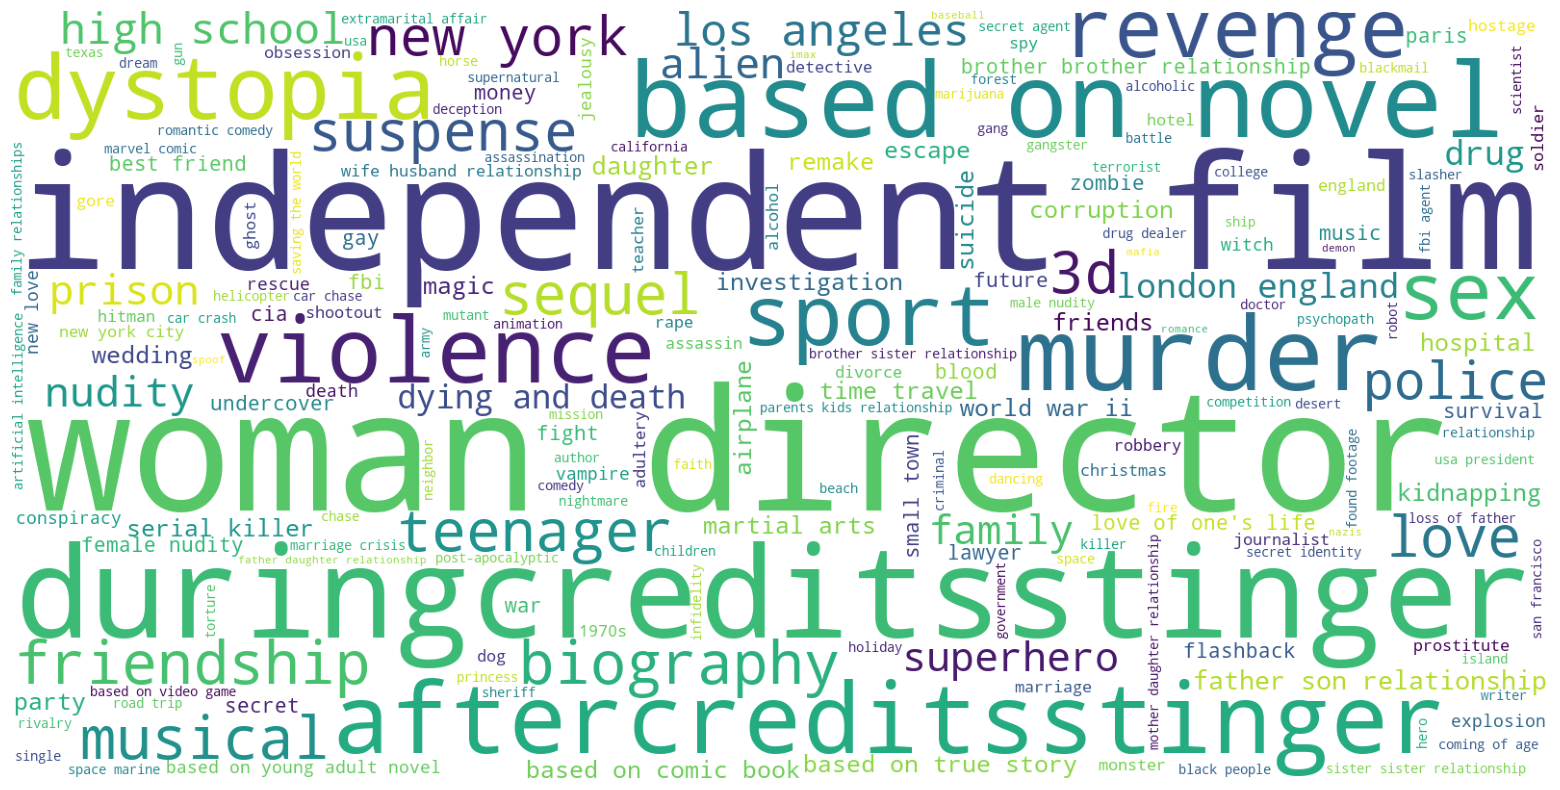

In [25]:
# Getting insight on the most used keywords across movies using word cloud
keywords = []
klst = df['keywords'].apply(lambda x: [i['name'] for i in x])
for word in klst:
    keywords.extend(word)

d = Counter(keywords)
wordcloud = WordCloud(width=1600, height=800, background_color ='white', collocations=False).generate_from_frequencies(d)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

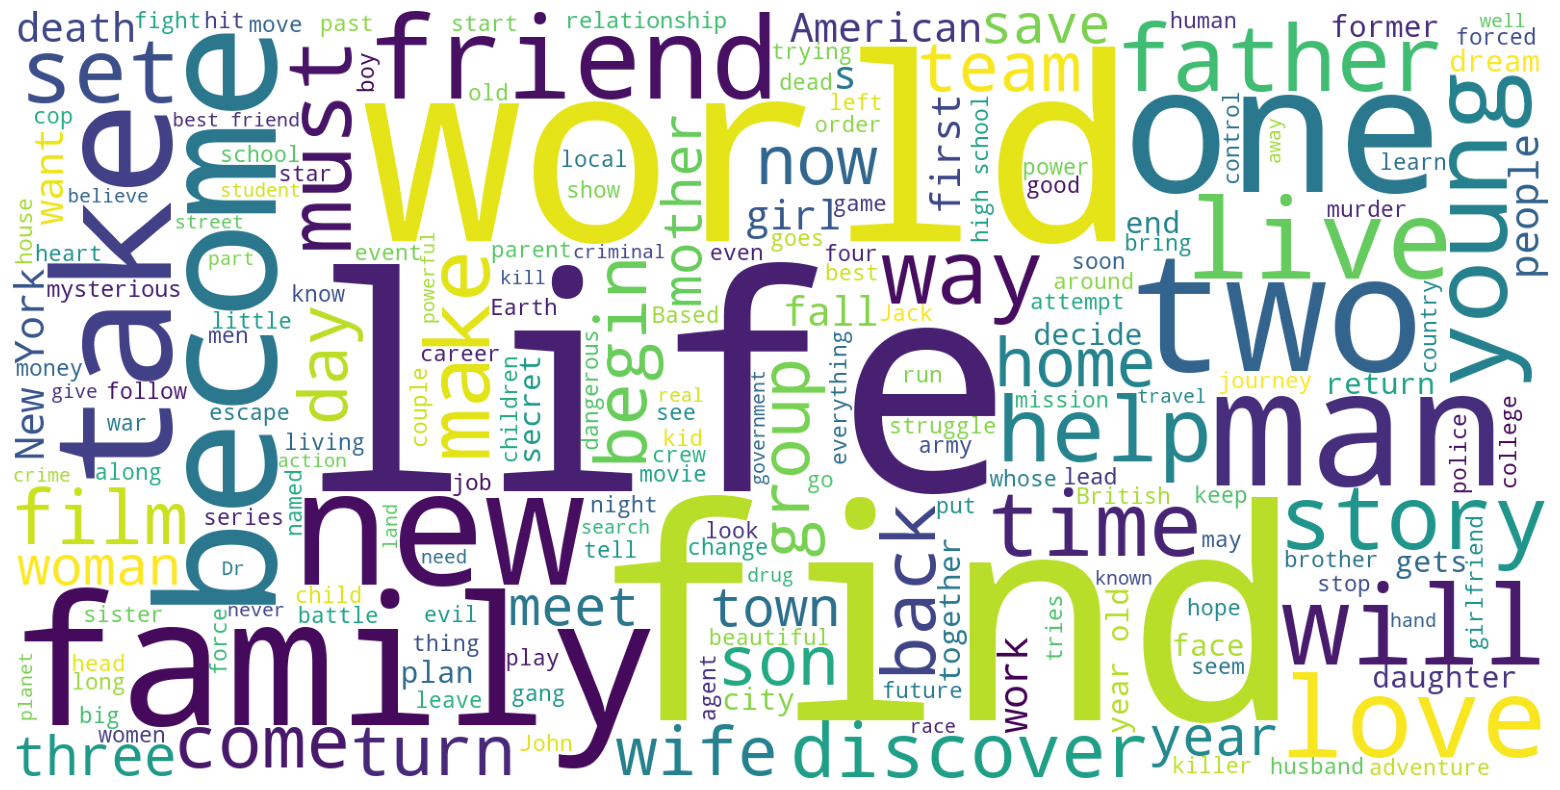

In [26]:
# Getting insight on the most used words used to describe movies in overview using word cloud
overviews = df['overview'].dropna()
words = ''
stopwords = set(STOPWORDS)
for val in overviews:
    val.lower()
    tokens = val.split()     
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width=1600, height=800, background_color ='white', stopwords = stopwords).generate(words)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

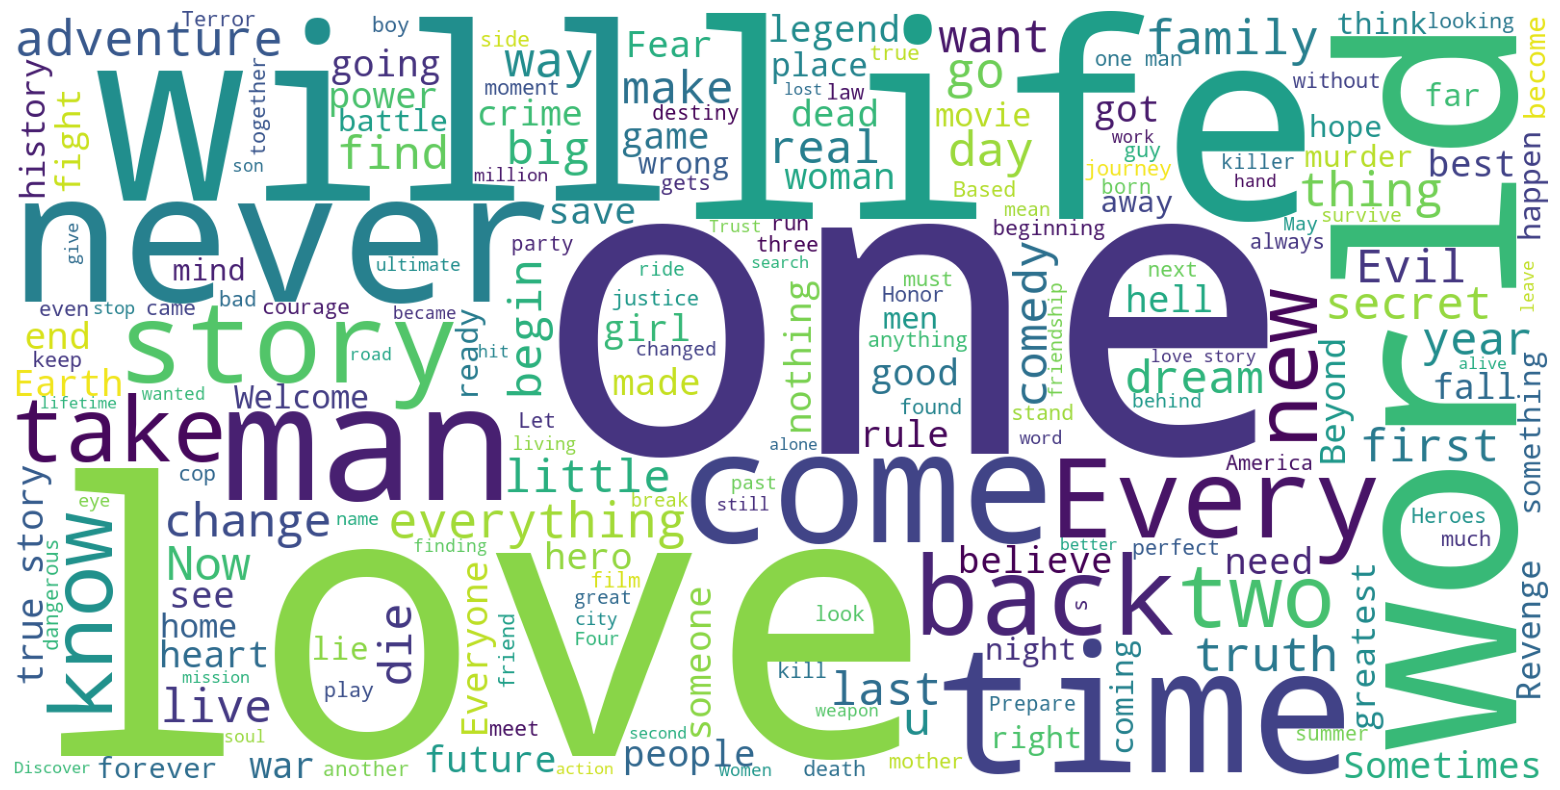

In [27]:
# Getting insight on the most used words in movie taglines using word cloud
taglines = df['tagline'].dropna()
words = ''
stopwords = set(STOPWORDS)
for val in taglines:
    val.lower()
    tokens = val.split()     
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width=1600, height=800, background_color ='white', stopwords = stopwords).generate(words)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

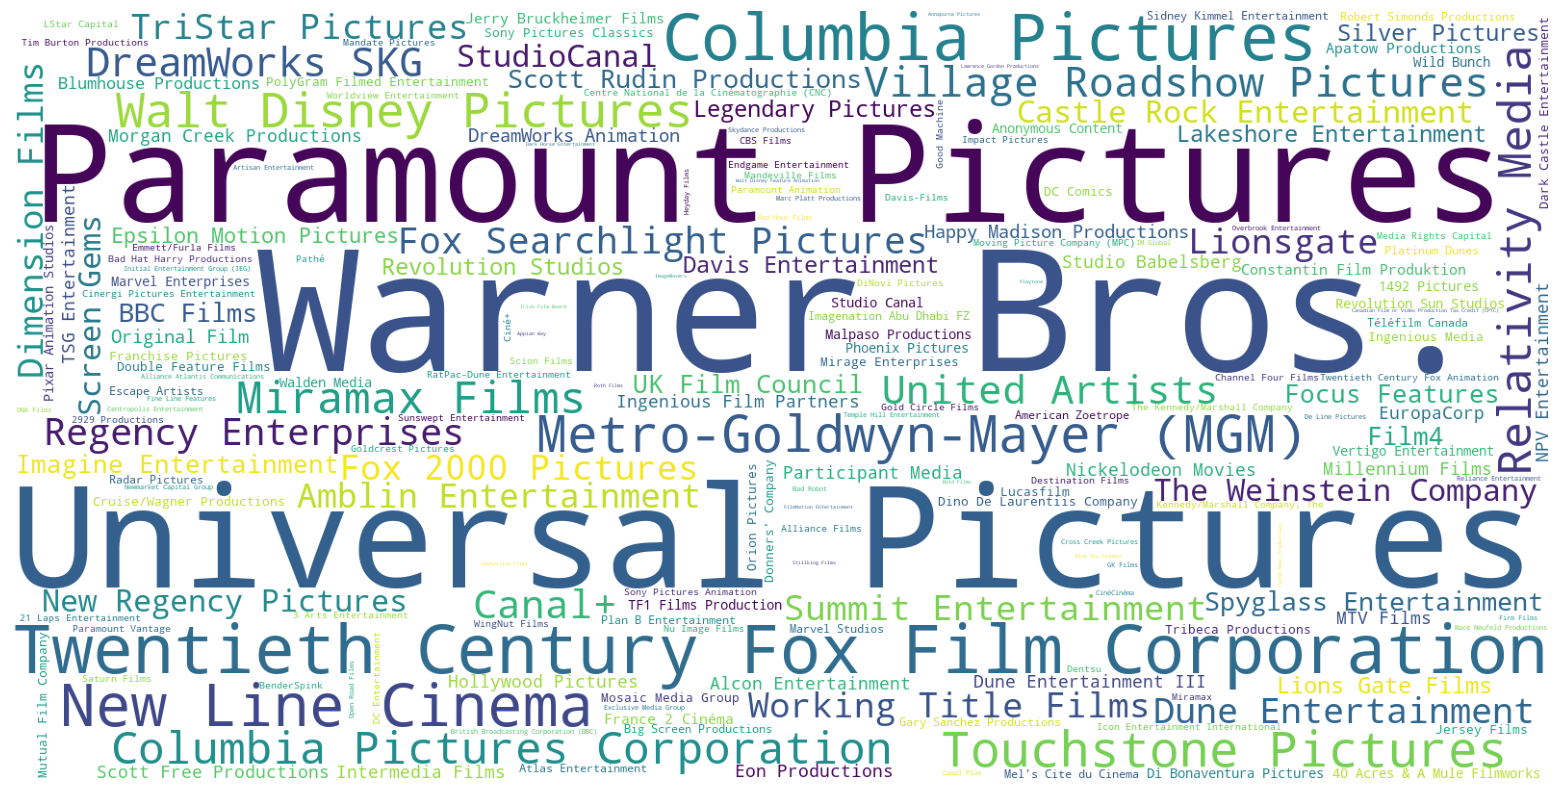

In [28]:
# Getting insight on the companies which produced the most movies
prodcoms = []
pclst = df['production_companies'].apply(lambda x: [i['name'] for i in x])
for comp in pclst:
    prodcoms.extend(comp)

d = Counter(prodcoms)
wordcloud = WordCloud(width=1600, height=800, background_color ='white', collocations=False).generate_from_frequencies(d)

plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off");

#### Bivariate Analysis

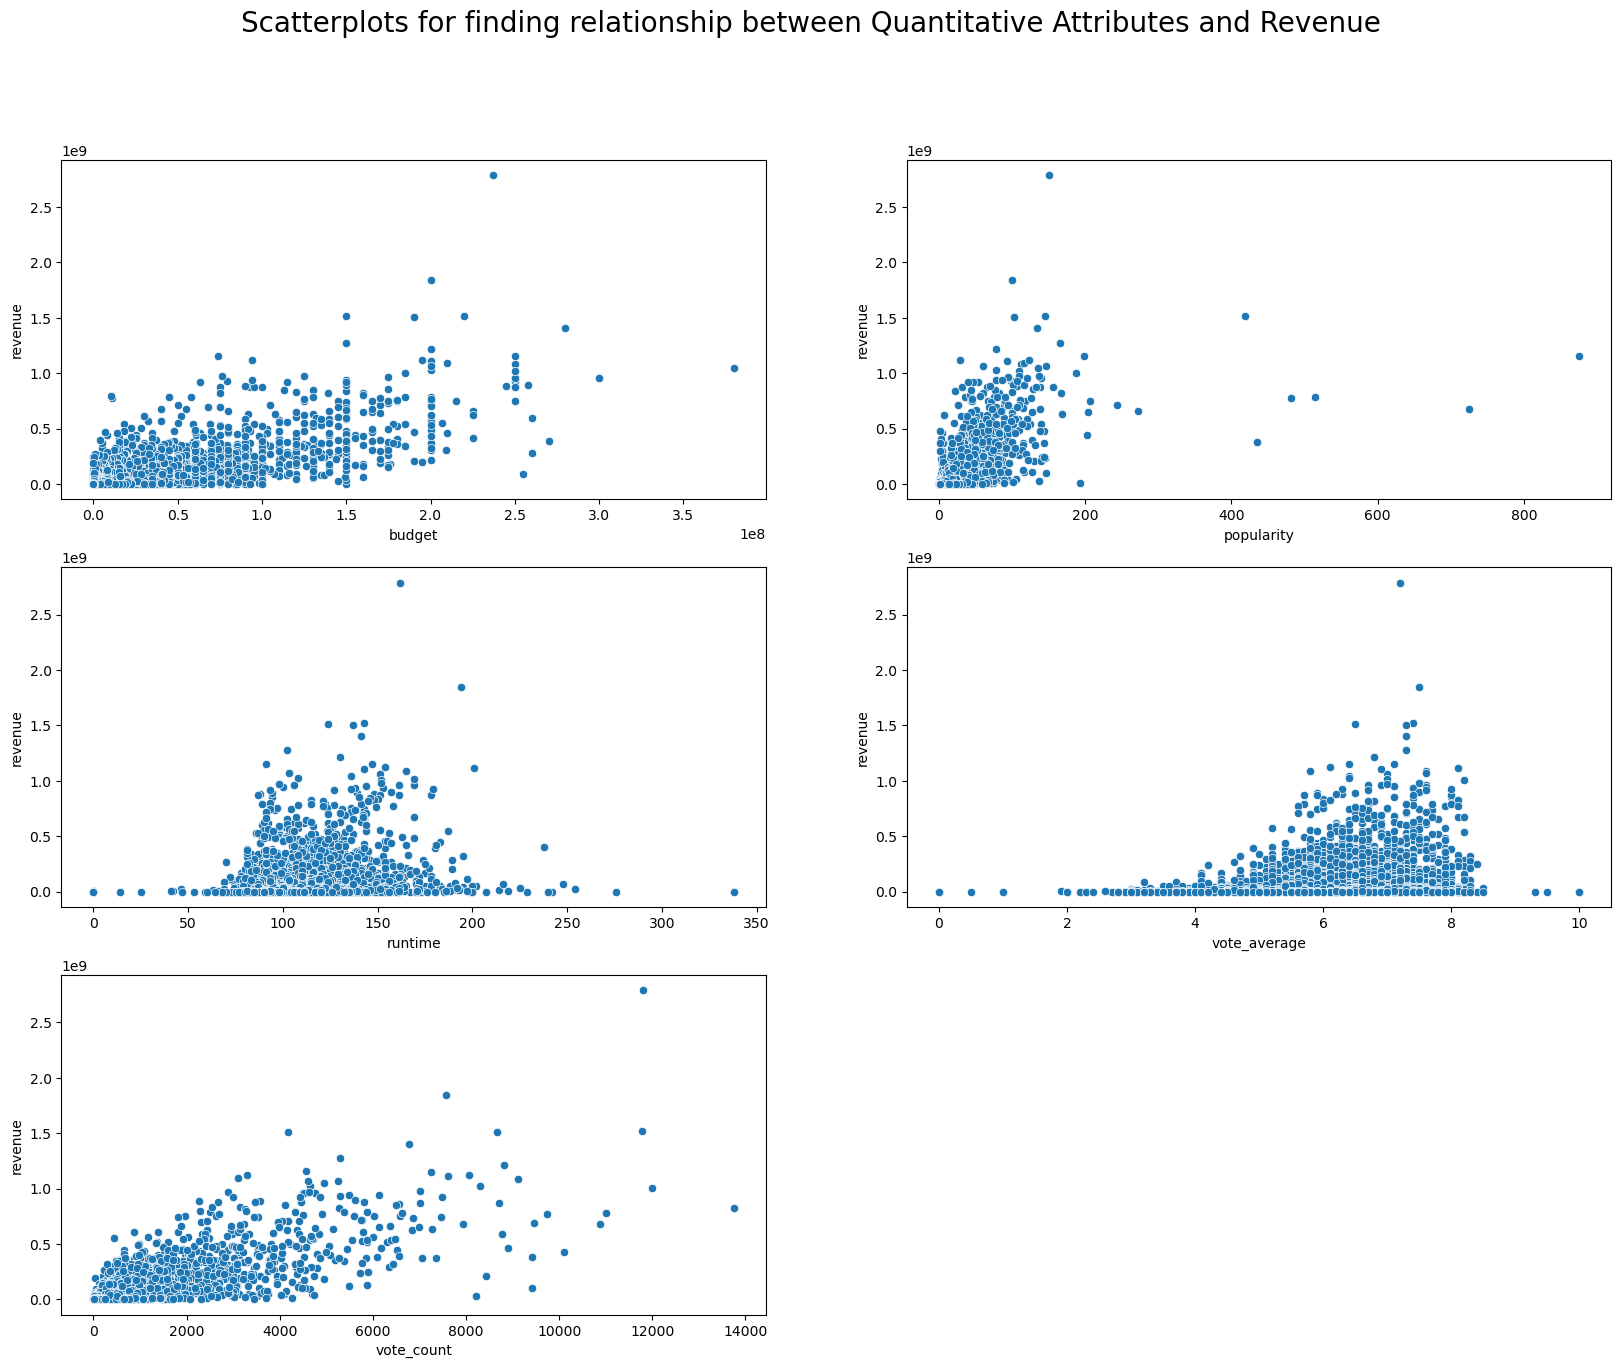

In [29]:
# Let us find the relationship between our target variable 'Revenue' and other possible quantitative predictor variables using scatter plot
fig,ax = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('Scatterplots for finding relationship between Quantitative Attributes and Revenue', fontsize = 20)

sns.scatterplot(ax = ax[0,0], x = 'budget', y = 'revenue', data = df)
sns.scatterplot(ax = ax[0,1], x = 'popularity', y = 'revenue', data = df)
sns.scatterplot(ax = ax[1,0], x = 'runtime', y = 'revenue', data = df)
sns.scatterplot(ax = ax[1,1], x = 'vote_average', y = 'revenue', data = df)
sns.scatterplot(ax = ax[2,0], x = 'vote_count', y = 'revenue', data = df)
fig.delaxes(ax[2,1])

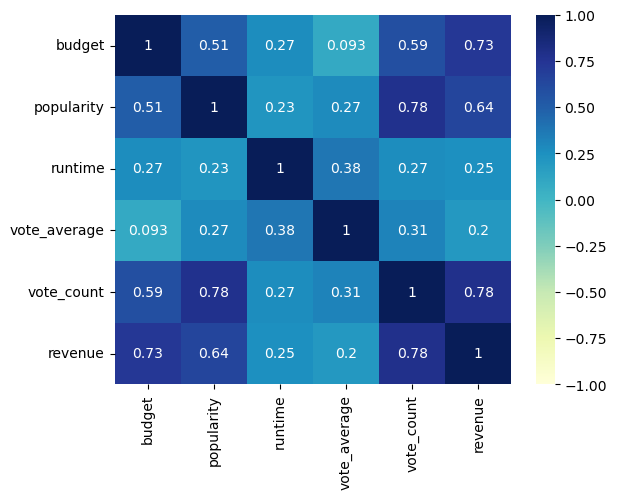

In [30]:
# Finding the correlation between the quantitative attributes present in the dataset using heatmap
sns.heatmap(df[['budget','popularity','runtime','vote_average','vote_count','revenue']].corr(), annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1);

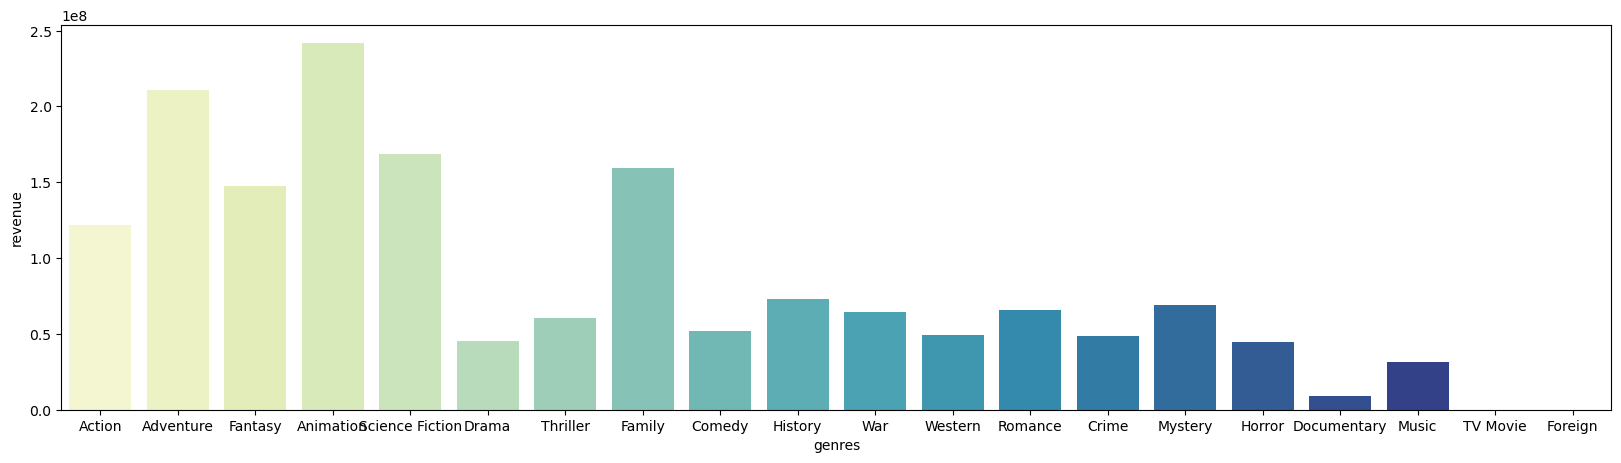

In [31]:
# Finding whether genre of the movie affects the average revenue
plt.figure(figsize=(20,5))
sns.barplot(x = 'genres', y = 'revenue', data = df, palette = 'YlGnBu', errorbar = None);

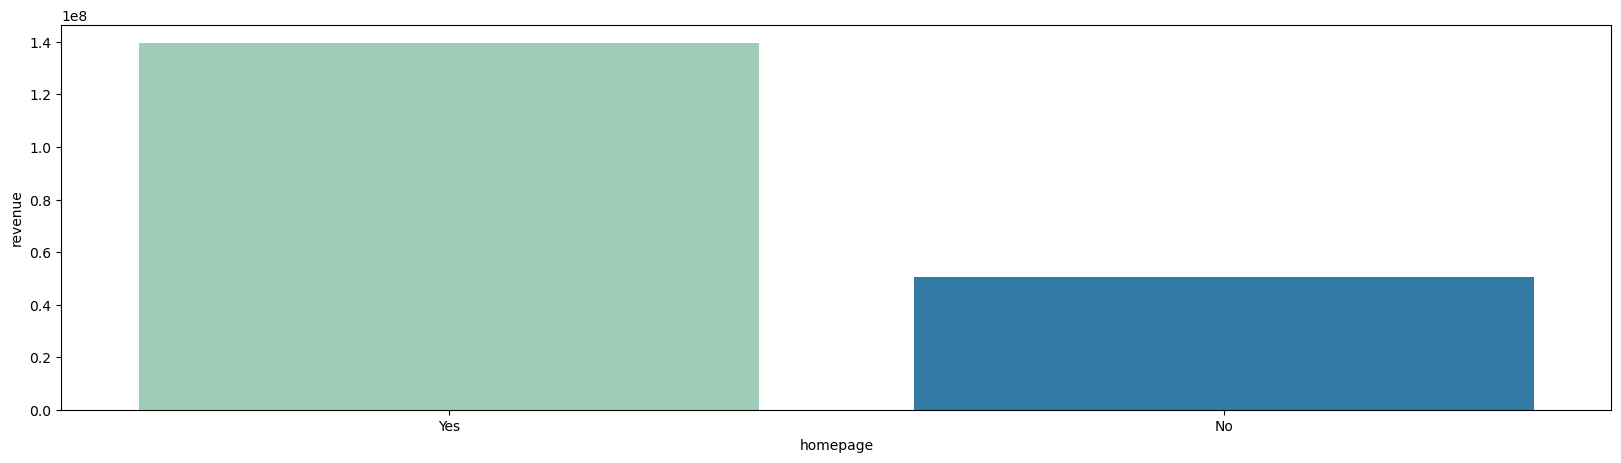

In [32]:
# Finding whether presence of homepage affects average movie revenue
has_home = df['homepage'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')
plt.figure(figsize=(20,5))
sns.barplot(x = has_home, y = df['revenue'], palette = 'YlGnBu', errorbar = None);

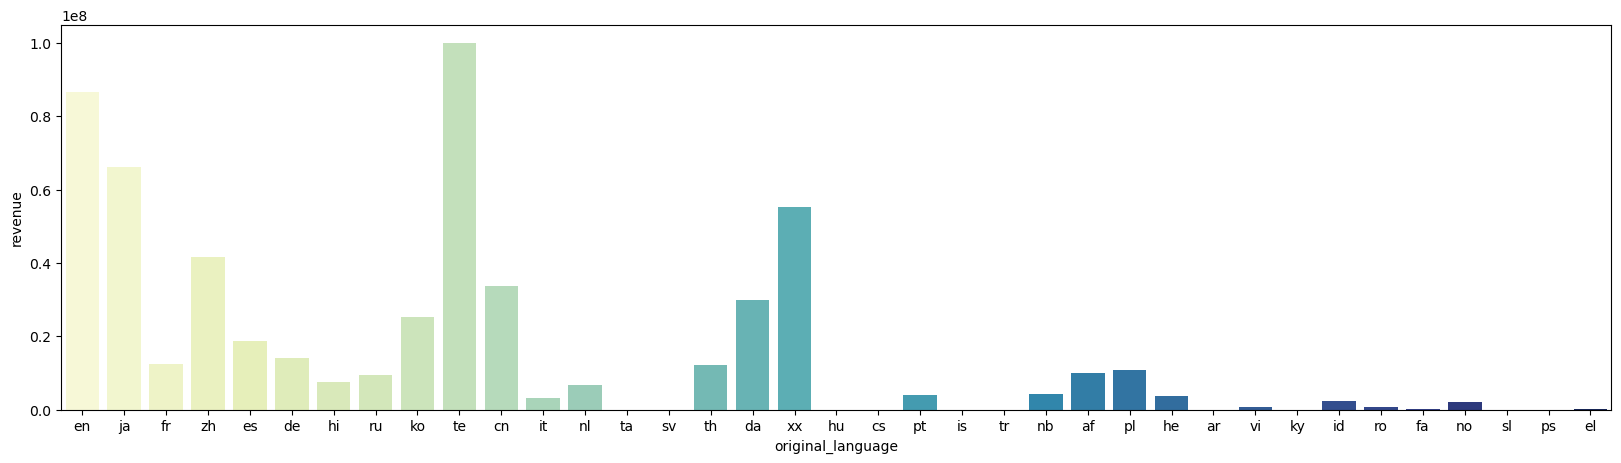

In [33]:
# Finding whether the original language of the movie affects the revenue
plt.figure(figsize=(20,5))
sns.barplot(x = 'original_language', y = 'revenue', data = df, palette = 'YlGnBu', errorbar = None);

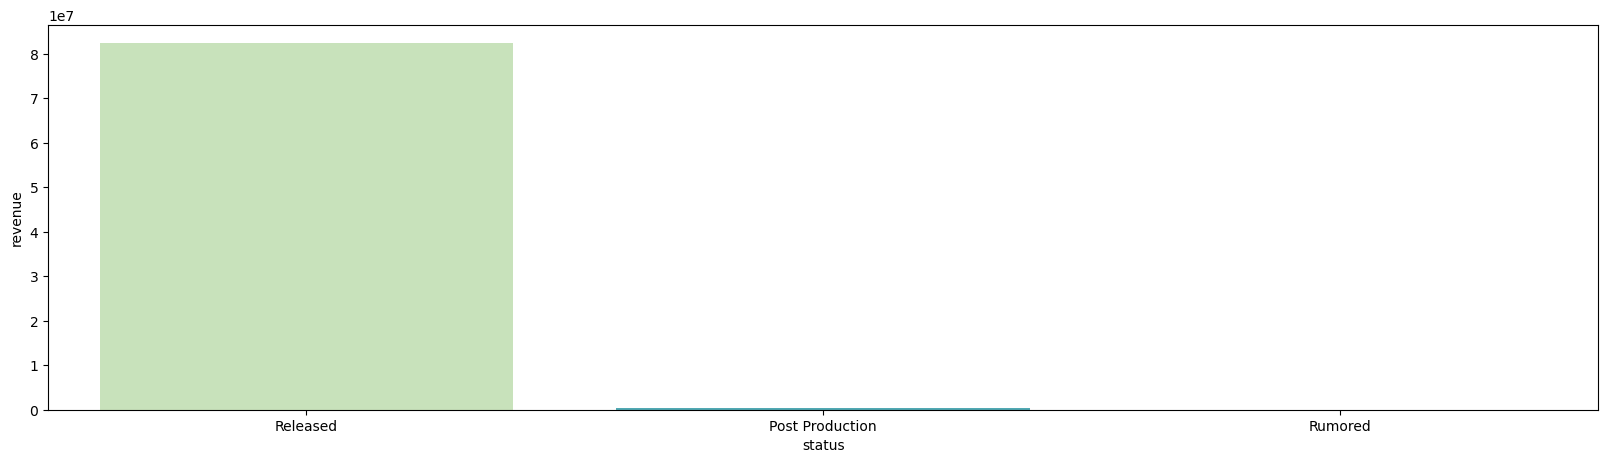

In [34]:
# Finding whether status affects revenue of movies
plt.figure(figsize=(20,5))
sns.barplot(x = 'status', y = 'revenue', data = df, palette = 'YlGnBu', errorbar = None);

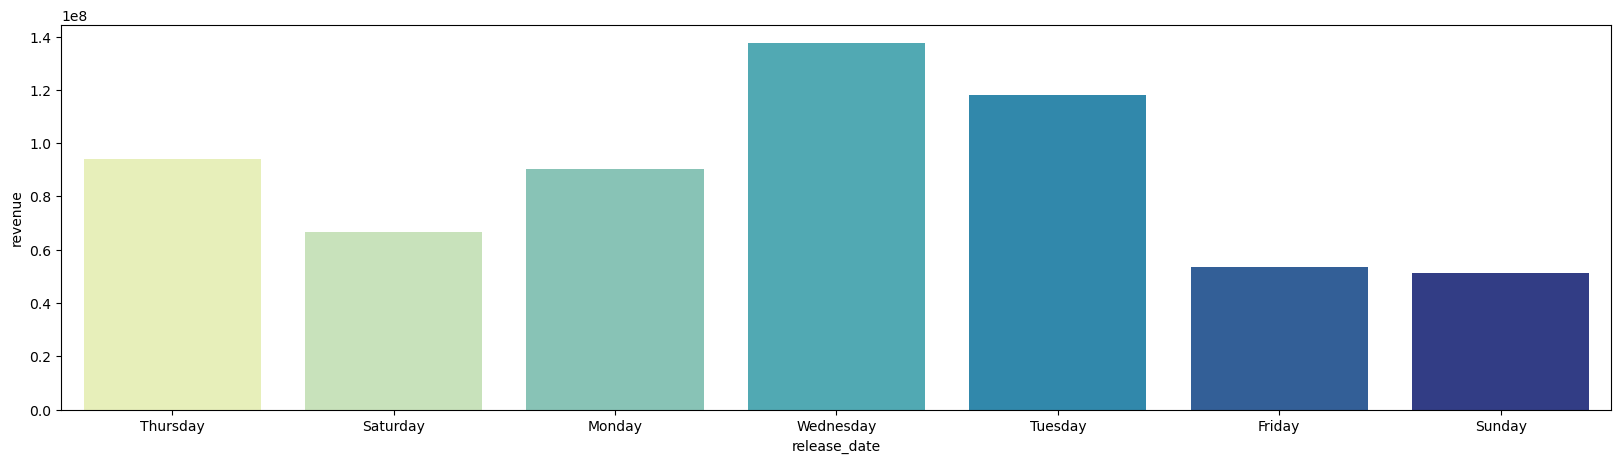

In [35]:
# Finding whether the release day of the week affects revenue
day = df['release_date'].dropna().apply(lambda x: x.strftime('%A'))
plt.figure(figsize=(20,5))
sns.barplot(x = day, y = df['revenue'], palette = 'YlGnBu', errorbar = None);

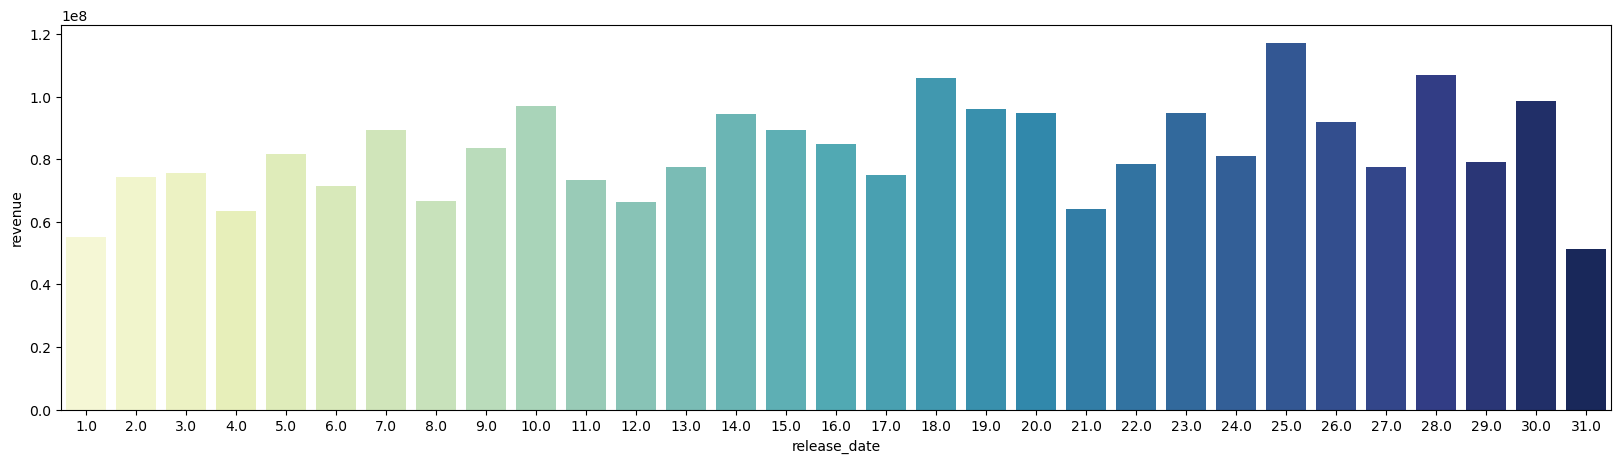

In [36]:
# Finding whether the release day of the month affects revenue
day = df['release_date'].apply(lambda x: x.day)
day = day.sort_values()
plt.figure(figsize=(20,5))
sns.barplot(x = day, y = df['revenue'], palette = 'YlGnBu', errorbar = None);

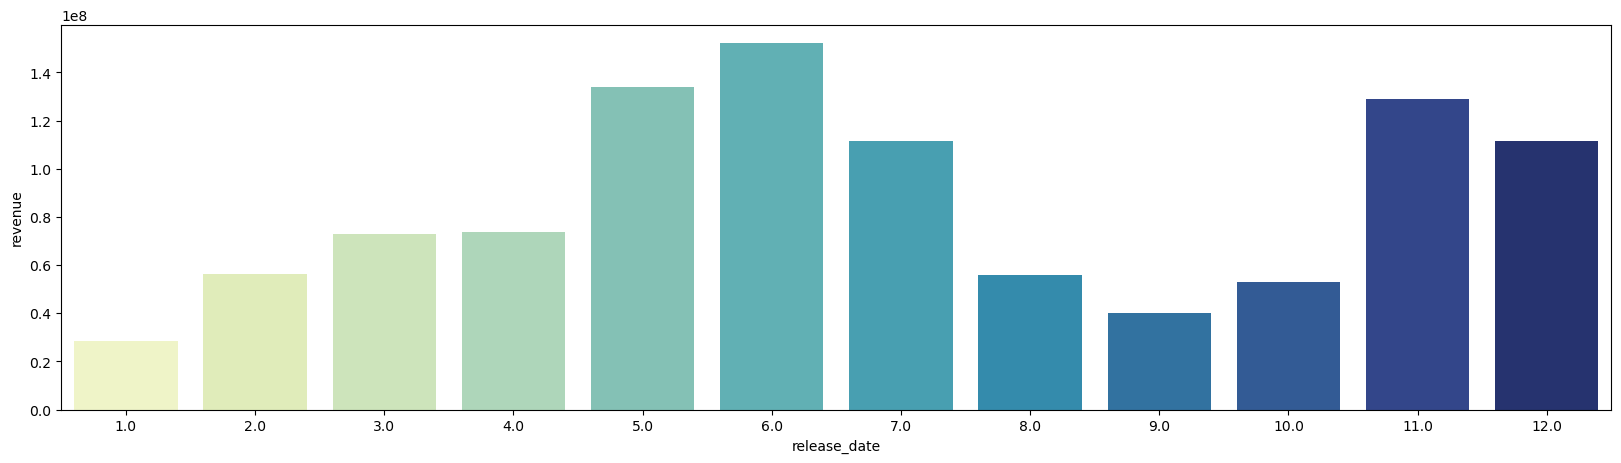

In [37]:
# Finding whether the release month affects revenue
month = df['release_date'].apply(lambda x: x.month)
month = month.sort_values()
plt.figure(figsize=(20,5))
sns.barplot(x = month, y = df['revenue'], palette = 'YlGnBu', errorbar = None);

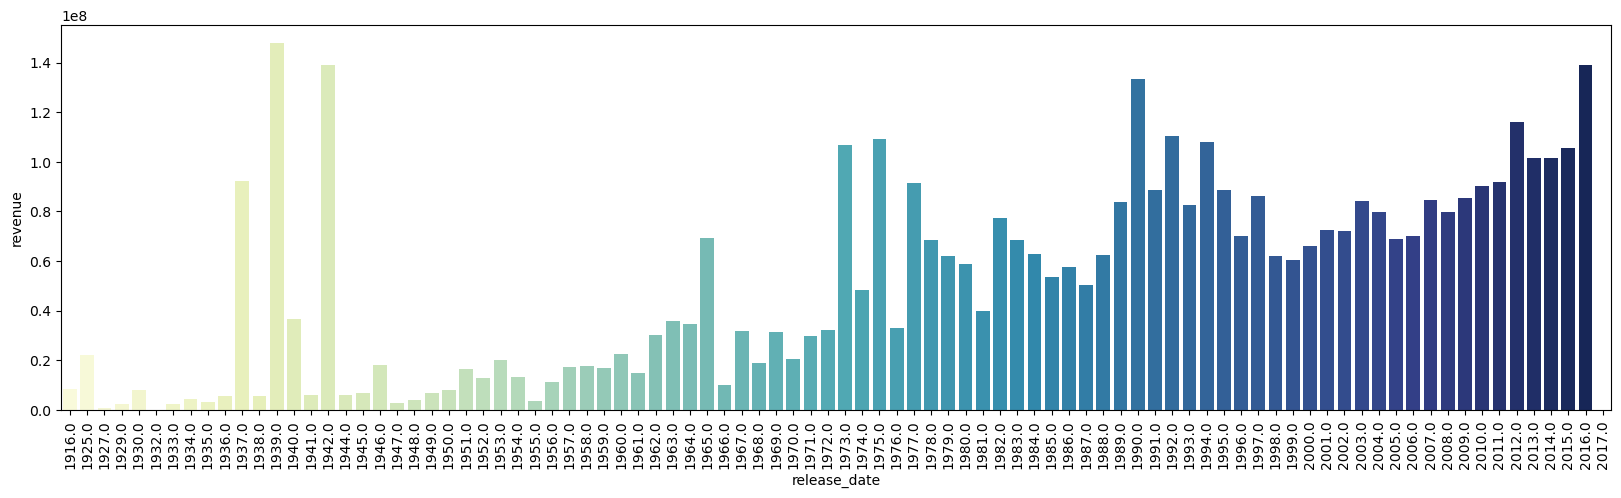

In [38]:
# Finding whether release year affects revenue
years = df['release_date'].apply(lambda x: x.year)
years = years.sort_values()
plt.figure(figsize=(20,5))
sns.barplot(x = years, y = df['revenue'], palette = 'YlGnBu', errorbar = None)
plt.xticks(rotation = 90);

### Dropping Unwanted Columns

<b>The release day, month and week seem to have some effect on revenue as seen from the above bar charts. Hence let us create three separate variables for the same and drop the attribute 'release_date'.</b>

In [39]:
# Creating the above-mentioned attributes
df['day'] = df['release_date'].apply(lambda x: x.weekday()) # 0 -> Monday, 6 -> Sunday
df['month'] = df['release_date'].apply(lambda x: x.month)
df['year'] = df['release_date'].apply(lambda x: x.year)

In [40]:
# Dropping the above-mentioned column
df = df.drop(['release_date'], axis = 1)

<b>The attributes 'id', 'original_title', 'title_x' and 'title_y' are used for the identification of the distinct movies that are present in the dataset and hence will be of no use for modelling and hence can be dropped.</b>

In [41]:
# Dropping the above-mentioned columns
df = df.drop(['id', 'original_title', 'title_x','title_y'], axis = 1)

<b>The attributes 'overview', 'keywords' and 'tagline' are textual data that give an insight into the movie's plot. We can hence assume that these attributes are not likely to be correlated to our target attribute 'revenue' and hence can be dropped.</b>

In [42]:
# Dropping the above-mentioned columns
df = df.drop(['overview', 'keywords', 'tagline'], axis = 1)

<b>The attribute 'spoken_languages' specifies all the languages that have been spoken in the movies. Since we already have the attribute 'original_language' specifying the primary language of the movies, hence we can drop the 'spoken_languages' attribute.</b>

In [43]:
# Dropping the above-mentioned column
df = df.drop(['spoken_languages'], axis = 1)

<b>The attribute 'cast' consists of all the actors who have acted in a movie. Due to the huge variety of actors that have played roles (lead & supporting) in movies, as seen from the wordclouds above, we can assume that there is going to be no significant correlation between this attribute and our target variable (revenue) and hence we can drop it. The 'crew', 'production_companies' and 'production_countries' attributes can also be dropped for similar reasoning.</b>

In [44]:
# Dropping the above-mentioned column
df = df.drop(['cast','crew','production_companies','production_countries'], axis = 1)

In [45]:
# Displaying the first 5 records of the data frame after dropping unwanted columns
df.head()

budget     genres                                      homepage  \
0  237000000     Action                   http://www.avatarmovie.com/   
1  300000000  Adventure  http://disney.go.com/disneypictures/pirates/   
2  245000000     Action   http://www.sonypictures.com/movies/spectre/   
3  250000000     Action            http://www.thedarkknightrises.com/   
4  260000000     Action          http://movies.disney.com/john-carter   

  original_language  popularity     revenue  runtime    status  vote_average  \
0                en  150.437577  2787965087    162.0  Released           7.2   
1                en  139.082615   961000000    169.0  Released           6.9   
2                en  107.376788   880674609    148.0  Released           6.3   
3                en  112.312950  1084939099    165.0  Released           7.6   
4                en   43.926995   284139100    132.0  Released           6.1   

   vote_count  day  month    year  
0       11800  3.0   12.0  2009.0  
1        4500  5.0    5.0  2007.0  
2        4466  0.0   10.0  2015.0  
3        9106  0.0    7.0  2012.0  
4        2124  2.0    3.0  2012.0

### Handling Missing Values

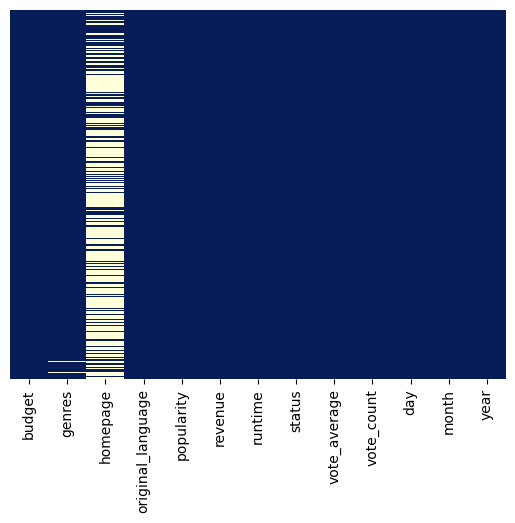

In [46]:
# Checking whether the dataset has any missing values by visualizing the missing values present in the dataset
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = "YlGnBu_r");

In [47]:
# Count of the missing values present in the dataset
df.isnull().sum()

budget                  0
genres                 28
homepage             3091
original_language       0
popularity              0
revenue                 0
runtime                 2
status                  0
vote_average            0
vote_count              0
day                     1
month                   1
year                    1
dtype: int64

In [48]:
# From the bar plot in the bivariate analysis, we can see that the presence of homepage affects revenue, i.e., 
#movies with homepage have a better revenue as compared to those that don't. Hence Let us just transform the attribute 
#into having two values -> 1 (i.e. has homepage) and 0 (i.e. doesn't have homepage)
df['homepage'] = df['homepage'].apply(lambda x: 1 if pd.notna(x) else 0)

In [49]:
# Since only 28 records, i.e. only 0.58% records, have missing genres, let us just go for deletion of these particular records
# because we will still have 99.42% of the records left for the modelling. Also since barely 1 record has a missing day,month and year
# and 2 have a missing runtime, let us also delete those.
df.dropna(subset = ['genres','day','month','year','runtime'], inplace = True)

In [50]:
# Checking whether all missing values have been removed from the dataset
df.isnull().sum()

budget               0
genres               0
homepage             0
original_language    0
popularity           0
revenue              0
runtime              0
status               0
vote_average         0
vote_count           0
day                  0
month                0
year                 0
dtype: int64

In [51]:
# Data frame after handling missing values
df.head()

budget     genres  homepage original_language  popularity     revenue  \
0  237000000     Action         1                en  150.437577  2787965087   
1  300000000  Adventure         1                en  139.082615   961000000   
2  245000000     Action         1                en  107.376788   880674609   
3  250000000     Action         1                en  112.312950  1084939099   
4  260000000     Action         1                en   43.926995   284139100   

   runtime    status  vote_average  vote_count  day  month    year  
0    162.0  Released           7.2       11800  3.0   12.0  2009.0  
1    169.0  Released           6.9        4500  5.0    5.0  2007.0  
2    148.0  Released           6.3        4466  0.0   10.0  2015.0  
3    165.0  Released           7.6        9106  0.0    7.0  2012.0  
4    132.0  Released           6.1        2124  2.0    3.0  2012.0

### Handling Outliers

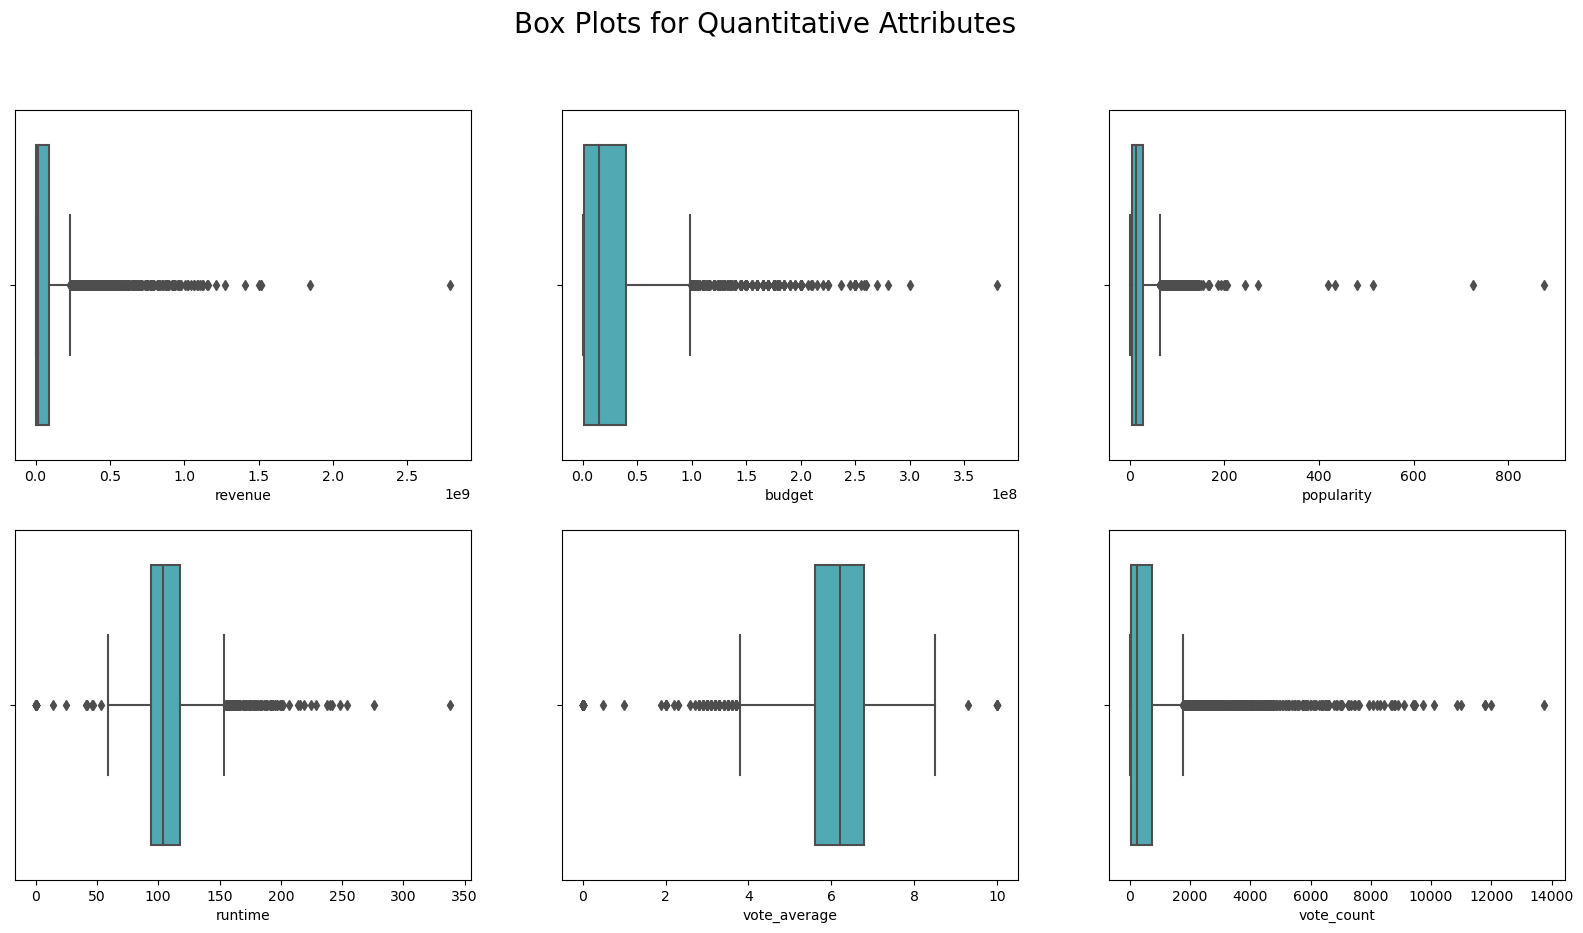

In [52]:
# Using Boxplots to visualize outliers
fig,ax = plt.subplots(2,3,figsize=(20, 10))
fig.suptitle('Box Plots for Quantitative Attributes', fontsize = 20)

sns.boxplot(ax = ax[0,0], x = 'revenue', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,1], x = 'budget', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,2], x = 'popularity', data = df, palette = 'YlGnBu')

sns.boxplot(ax = ax[1,0], x = 'runtime', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,1], x = 'vote_average', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,2], x = 'vote_count', data = df, palette = 'YlGnBu');

In [53]:
# Performing cube root transformation on 'revenue', 'budget', 'popularity' and 'vote_count'
df['revenue'] = np.cbrt(df['revenue'])
df['budget'] = np.cbrt(df['budget'])
df['popularity'] = np.cbrt(df['popularity'])
df['vote_count'] = np.cbrt(df['vote_count'])

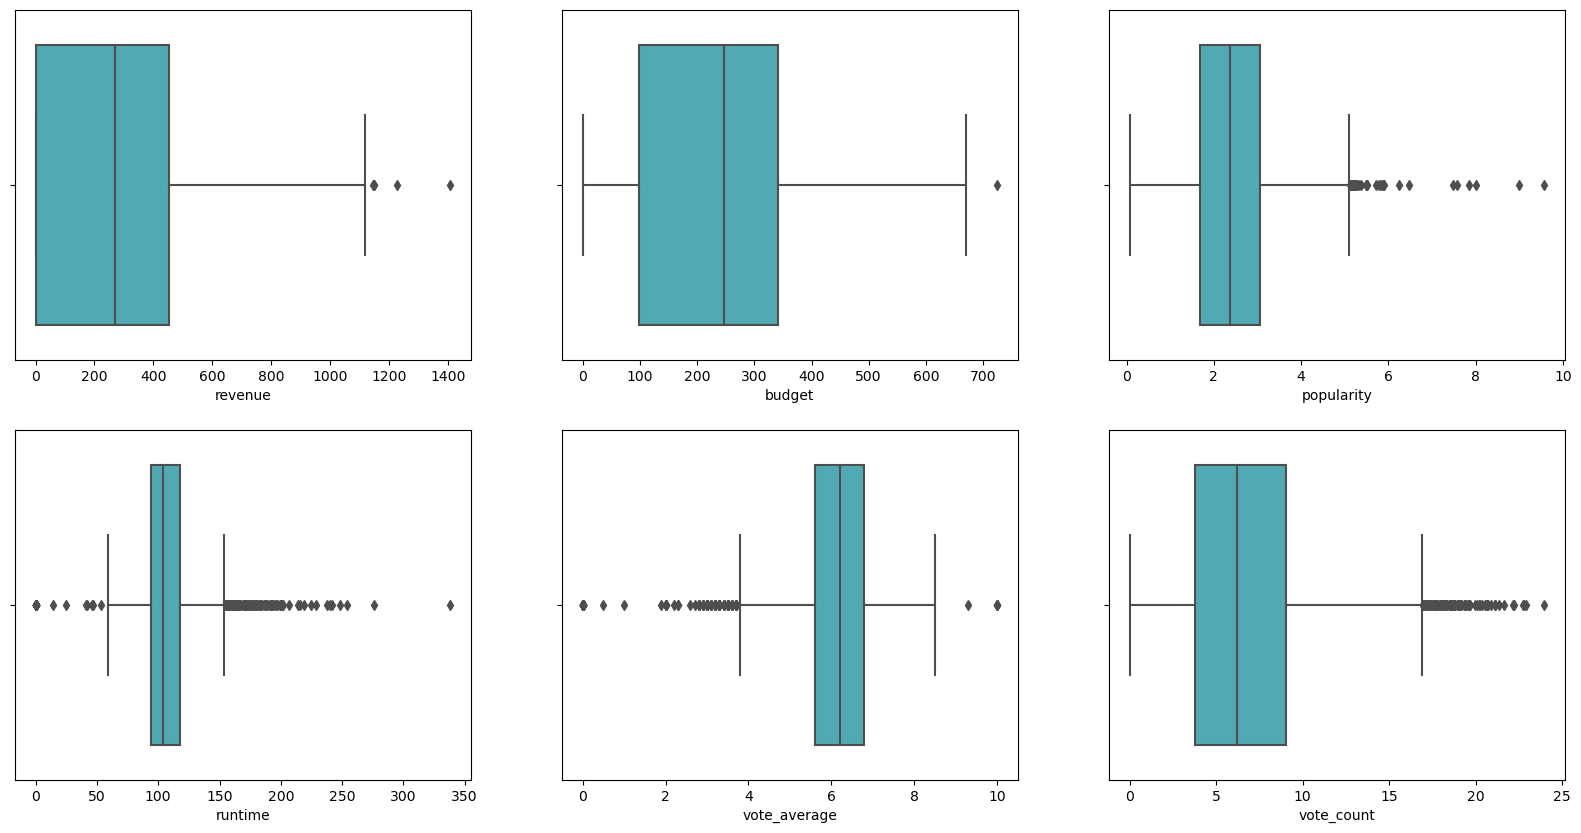

In [54]:
# Using Boxplots to see status of outliers after transformations
fig,ax = plt.subplots(2,3,figsize=(20, 10))

sns.boxplot(ax = ax[0,0], x = 'revenue', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,1], x = 'budget', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[0,2], x = 'popularity', data = df, palette = 'YlGnBu')

sns.boxplot(ax = ax[1,0], x = 'runtime', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,1], x = 'vote_average', data = df, palette = 'YlGnBu')
sns.boxplot(ax = ax[1,2], x = 'vote_count', data = df, palette = 'YlGnBu');

### Encoding Categorical Attributes

In [55]:
# Creating an instance of Label Encoder
le = LabelEncoder()

In [56]:
# Encoding categorical values using Label Encoder
df['genres'] = le.fit_transform(df['genres'])
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(genre_mapping)

{'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'Foreign': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}


In [57]:
df['original_language'] = le.fit_transform(df['original_language'])
lang_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(lang_mapping)

{'af': 0, 'ar': 1, 'cn': 2, 'cs': 3, 'da': 4, 'de': 5, 'el': 6, 'en': 7, 'es': 8, 'fa': 9, 'fr': 10, 'he': 11, 'hi': 12, 'hu': 13, 'id': 14, 'is': 15, 'it': 16, 'ja': 17, 'ko': 18, 'ky': 19, 'nb': 20, 'nl': 21, 'no': 22, 'pl': 23, 'ps': 24, 'pt': 25, 'ro': 26, 'ru': 27, 'sl': 28, 'sv': 29, 'ta': 30, 'te': 31, 'th': 32, 'tr': 33, 'vi': 34, 'xx': 35, 'zh': 36}


In [58]:
df['status'] = le.fit_transform(df['status'])
status_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(status_mapping)

{'Post Production': 0, 'Released': 1, 'Rumored': 2}


### Splitting the Dataset into Dependent and Independent Variables

In [59]:
# y -> dependent variable(target), X -> independent variables(predictors)
y = df['revenue']
X = df.drop(['revenue'], axis = 1)

In [60]:
# Displaying the first five instances of the dependent variable
y.head()

0    1407.437474
1     986.827240
2     958.528783
3    1027.547216
4     657.421143
Name: revenue, dtype: float64

In [61]:
# Displaying the first five records of the independent variables
X.head()

budget  genres  homepage  original_language  popularity  runtime  \
0  618.846276       0         1                  7    5.318454    162.0   
1  669.432950       1         1                  7    5.181128    169.0   
2  625.732475       0         1                  7    4.753025    148.0   
3  629.960525       0         1                  7    4.824770    165.0   
4  638.250430       0         1                  7    3.528395    132.0   

   status  vote_average  vote_count  day  month    year  
0       1           7.2   22.766381  3.0   12.0  2009.0  
1       1           6.9   16.509636  5.0    5.0  2007.0  
2       1           6.3   16.467951  0.0   10.0  2015.0  
3       1           7.6   20.882182  0.0    7.0  2012.0  
4       1           6.1   12.854391  2.0    3.0  2012.0

### Feature Scaling

In [62]:
# Creating an instance of Robust Scaler
scale = RobustScaler()

In [63]:
# Scaling the independent variables according to the inter-quartile range
X_scaled = scale.fit_transform(X)

In [64]:
# Replacing the orginal values with the scaled values
X = pd.DataFrame(X_scaled, columns = X.columns)

In [65]:
# Checking whether the values have been successfully scaled
X.head()

budget  genres  homepage  original_language  popularity   runtime  \
0  1.527450   -1.00       1.0                0.0    2.165324  2.416667   
1  1.735036   -0.75       1.0                0.0    2.064827  2.708333   
2  1.555708   -1.00       1.0                0.0    1.751539  1.833333   
3  1.573059   -1.00       1.0                0.0    1.804042  2.541667   
4  1.607077   -1.00       1.0                0.0    0.855346  1.166667   

   status  vote_average  vote_count  day     month      year  
0     0.0      0.833333    3.155905 -0.5  0.833333  0.333333  
1     0.0      0.583333    1.964196  0.5 -0.333333  0.166667  
2     0.0      0.083333    1.956256 -2.0  0.500000  0.833333  
3     0.0      1.166667    2.797025 -2.0  0.000000  0.583333  
4     0.0     -0.083333    1.267989 -1.0 -0.666667  0.583333

In [66]:
# Saving the scaler object for later use during deployment
pickle.dump(scale,open("scaler.pkl","wb"))

### Splitting the Dataset into Training and Testing Set

In [67]:
# Splitting the dataset in a 75:25 train-test split ratio (i.e. 75% records will belong to training set and rest 25% to the testing set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model Building

### Linear Regressor

In [68]:
# Creating an instance of the model
lr = LinearRegression()

In [69]:
# Fitting the model on the training set
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
# Getting the model predictions
y_pred = lr.predict(X_test)

#### Evaluating Model Performance

In [71]:
# Mean Squared Error
mean_squared_error(y_test,y_pred)

14349.028200701816

In [72]:
# Root Mean Squared Error
mean_squared_error(y_test,y_pred,squared=False)

119.78742922653369

In [73]:
# Mean Aboslute Error
mean_absolute_error(y_test,y_pred)

89.56338652485672

In [74]:
# R-squared Score
r2_score(y_test,y_pred)

0.7748078208529827

### Random Forest Regressor

In [75]:
# Creating an instance of the model
rf = RandomForestRegressor()

In [76]:
# Fitting the model on the training set
rf.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
# Getting the model predictions
y_pred = rf.predict(X_test)

#### Evaluating Model Performance

In [78]:
# Mean Squared Error
mean_squared_error(y_test,y_pred)

13351.43096299588

In [79]:
# Root Mean Squared Error
mean_squared_error(y_test,y_pred,squared=False)

115.54839229948585

In [80]:
# Mean Aboslute Error
mean_absolute_error(y_test,y_pred)

83.17910726645323

In [81]:
# R-squared Score
r2_score(y_test,y_pred)

0.7904640097410258

### Gradient Boosting Regressor

In [82]:
# Creating an instance of the model
gb = GradientBoostingRegressor()

In [83]:
# Fitting the model on the training set
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [84]:
# Getting the model predictions
y_pred = gb.predict(X_test)

#### Evaluating Model Performance

In [85]:
# Mean Squared Error
mean_squared_error(y_test,y_pred)

12859.039360143655

In [86]:
# Root Mean Squared Error
mean_squared_error(y_test,y_pred,squared=False)

113.39770438656885

In [87]:
# Mean Aboslute Error
mean_absolute_error(y_test,y_pred)

82.26839734968787

In [88]:
# R-squared Score
r2_score(y_test,y_pred)

0.7981915531320523

### Light GBM Regressor

In [89]:
# Creating an instance of the model
lg = LGBMRegressor()

In [90]:
# Fitting the model on the training set
lg.fit(X_train,y_train)

LGBMRegressor()

In [91]:
# Getting the model predictions
y_pred = lg.predict(X_test)

#### Evaluating Model Performance

In [92]:
# Mean Squared Error
mean_squared_error(y_test,y_pred)

13165.94818070476

In [93]:
# Root Mean Squared Error
mean_squared_error(y_test,y_pred,squared=False)

114.74296571339246

In [94]:
# Mean Absolute Error
mean_absolute_error(y_test,y_pred)

82.7045499624674

In [95]:
# R-squared Score
r2_score(y_test,y_pred)

0.7933749575316467

### Comparing Model Performance 
<b>Note: 'a > b' indicates 'a' performed better than 'b' for that particular evaluation metric.</b><br>
<b>Mean Squared Error:</b> Gradient Boosting Regressor > Light GBM Regressor > Random Forest Regressor > Linear Regressor 
<br>(lower the MSE value, better the model)<br>
<b>Root Mean Squared Error:</b> Gradient Boosting Regressor > Light GBM Regressor > Random Forest Regressor > Linear Regressor <br>(lower the RMSE value, better the model)<br>
<b>Mean Absolute Error:</b> Gradient Boosting Regressor > Light GBM Regressor > Random Forest Regressor > Linear Regressor <br>(lower the MAE value, better the model)<br>
<b>R-squared Score:</b>  Gradient Boosting Regressor > Light GBM Regressor > Random Forest Regressor > Linear Regressor <br>(higher the R2 value, better the model)<br><br>
<b>By analyzing the evaluation metrics, we can see that Gradient Boosting Regressor performs the best and hence Gradient Boosting Regressor is the chosen ML Model for the deployment of Movie Box Office Gross Prediction.</b>

In [97]:
# Saving the model object for later use during deployment
pickle.dump(gb,open("model.pkl","wb"))